In [1]:
%matplotlib notebook
import numpy as np
import hublib.rappture as rappture
import ipywidgets as widgets
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

<IPython.core.display.Javascript object>

In [2]:
import hublib
hublib.__version__

'0.9.12'

In [3]:
io = rappture.Tool("rtdnegf")

In [4]:
#io['input.phase(phs2).loader(loader)'] = "/apps/rtdnegf/current/rappture/examples/2bar.xml" 

In [5]:
io['input.phase(phs2).loader'].value

'2-barrier device'

In [6]:
# run the tool
io.run(verbose=True)

TOOL_PARAMETERS=/home/nanohub/mmh/data/sessions/1331699/5651/driver.hz /apps/rtdnegf/current/middleware/invoke -d /home/nanohub/mmh/data/sessions/1331699/5651


In [7]:
NVD = io['input.phase(phs2).group(tabs).group(basic).integer(bias_step)'].value
bandmodel = io['input.phase(phs2).choice(band_model)'].value

for i in range(NVD):
    if bandmodel == 'em':
        dfile = "%s/RTD_%d_ldosp1d_0.dat" % (output_dir, i)
    else:
        dfile = "%s/RTD_%d_ldosp1d.dat" % (output_dir, i)
    with open(dfile) as f:
        

## hublib does not have support for visualizing sequences of curves yet.  But we can look at individual curves.  

<IPython.core.display.Javascript object>


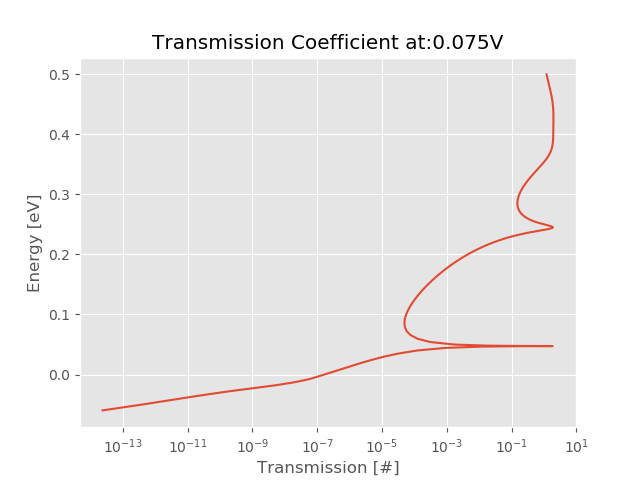

In [8]:
io['output.sequence(Tplot).element(4).curve(TE)'].plot(single=True)

<IPython.core.display.Javascript object>


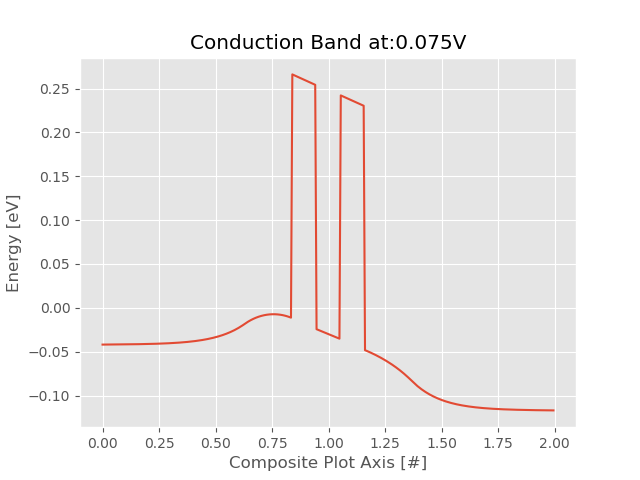

In [9]:
io['output.sequence(BandsTIV).element(4).curve(CB)'].plot(single=True)

<IPython.core.display.Javascript object>


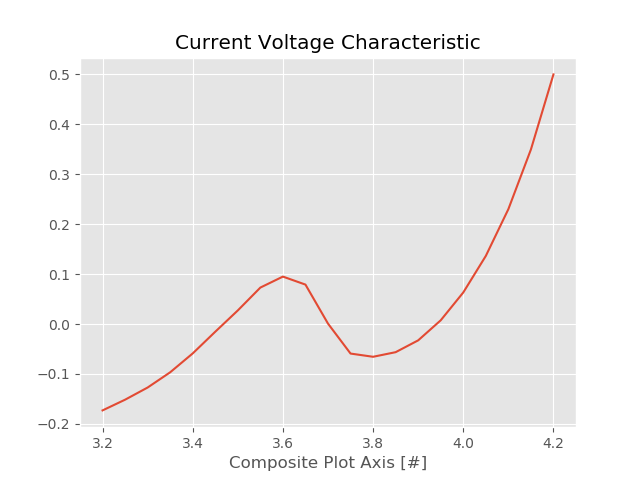

In [10]:
io['output.sequence(BandsTIV).element(14).curve(IV)'].plot(single=True)

In [11]:
te = io['output.sequence(Tplot).element(14).curve(TE).component.xy'].value
cb = io['output.sequence(CVRF).element(14).curve(CB).component.xy'].value
iv = io['output.curve(IV).component.xy'].value

In [12]:
#te_plot = hv.Curve(te, 'Transmission [#]', 'Energy [eV]')
#cb_plot = hv.Curve(cb, 'Length [nm]', 'Energy [eV]')
#iv_plot = hv.Curve(iv, 'Bias [V]', 'Current [A/cm2]')

In [13]:
io['output.sequence(Tplot).element(14).index'].value

'14_Bias=0.325V'

In [14]:
io['output.sequence(CVRF).element(21).index'].value

'21_Bias=0.5V'

In [15]:
#io['input.phase(phs2).loader'] = "/apps/rtdnegf/current/rappture/examples/3bar.xml" 
#io.run()

<IPython.core.display.Javascript object>


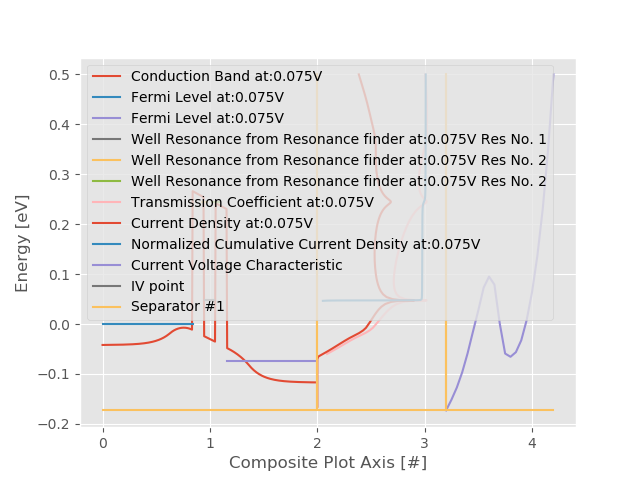

In [16]:
io['output.sequence(BandsTIV).element(4).curve(CB)'].plot()

In [17]:
# io['output.sequence(Tplot).element(1).curve(TE)'].plot()

In [18]:
bias = iv[:,0]
bias

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  ])

In [19]:
data = []
for i, v in enumerate(bias):    
    cb = io['output.sequence(CVRF).element(%d).curve(CB).component.xy' % (i+1)].value
    trace = go.Scatter(
        visible=False,
        x=cb[:,0],
        y=cb[:,1]
    ) 
    data.append(trace)
data[0]['visible'] = True

for i, v in enumerate(bias):
    te = io['output.sequence(Tplot).element(%d).curve(TE).component.xy' % (i+1)].value
    trace = go.Scatter(
        visible=False,
        x=te[:,0],
        y=te[:,1],
        xaxis='x2',
        yaxis='y'
    ) 
    data.append(trace)
data[len(bias)]['visible'] = True
    

trace = go.Scatter(
    visible=True,
    x=iv[:,0],
    y=iv[:,1],
    xaxis='x3',
    yaxis='y3',
)
data.append(trace)

for i, v in enumerate(bias):
    trace = go.Scatter(
        name='Bias',
        visible=False,
        x=[iv[i,0]],
        y=[iv[i,1]],
        xaxis='x3',
        yaxis='y3',
        mode='markers',
        marker=dict(
            size=10,
            color='red'
        )
    )
    data.append(trace)
data[len(bias)*2+1]['visible'] = True


steps = []
for i in range(len(bias)):
    step = dict(
        label=str(bias[i]),
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True  # show just this curve
    step['args'][1][len(bias) + i] = True  # show just this curve
    step['args'][1][2*len(bias)] = True  # show just this curve
    step['args'][1][2*len(bias)+1+i] = True  # show just this curve

    steps.append(step)

sliders = [dict(
    active = 0,  # start here
    currentvalue = {"prefix": "Bias: ", 'suffix': 'V'},
    steps = steps
)]


layout = go.Layout(
    title='TITLE',
    sliders=sliders,
    xaxis=dict(
        title='x label',
        domain=[0,.3]
    ),
    yaxis=dict(
        domain=[0,1]
    ),
    xaxis2=dict(
        domain=[.3,.6]
    ),
    xaxis3=dict(
        domain=[.7,1],
    ),
    yaxis3=dict(
        domain=[0,1],
        anchor='x3'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-subplots-shared-yaxes')